In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
pd.set_option("display.max_rows", 1000)


In [25]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [26]:
# loading the data
data = pd.read_csv('pacific.csv')
data.head()

ID                 Name      Date  Time Event Status Latitude  \
0  EP011949              UNNAMED  19490611     0           TS    20.2N   
1  EP011949              UNNAMED  19490611   600           TS    20.2N   
2  EP011949              UNNAMED  19490611  1200           TS    20.2N   
3  EP011949              UNNAMED  19490611  1800           TS    20.3N   
4  EP011949              UNNAMED  19490612     0           TS    20.4N   

  Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  Low Wind NW  \
0    106.3W            45              -999  ...         -999         -999   
1    106.4W            45              -999  ...         -999         -999   
2    106.7W            45              -999  ...         -999         -999   
3    107.7W            45              -999  ...         -999         -999   
4    108.6W            45              -999  ...         -999         -999   

   Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  Moderate Wind NW  \
0              -999              -999              -999              -999   
1              -999              -999              -999              -999   
2              -999              -999              -999              -999   
3              -999              -999              -999              -999   
4              -999              -999              -999              -999   

   High Wind NE  High Wind SE  High Wind SW  High Wind NW  
0          -999          -999          -999          -999  
1          -999          -999          -999          -999  
2          -999          -999          -999          -999  
3          -999          -999          -999          -999  
4          -999          -999          -999          -999  

[5 rows x 22 columns]

In [27]:
# data.Status = pd.Categorical(data.Status)
# data['Status'] = data.Status.cat.codes
# data.head()

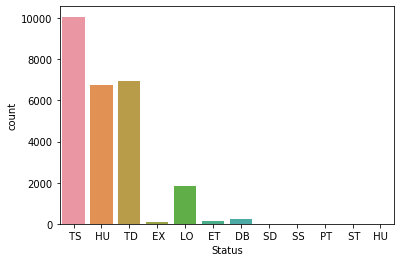

In [28]:
import seaborn as sns
sns.countplot(data['Status'], label='Count')
plt.show()

In [29]:
# data wrangling
pred_columns = data[:]
pred_columns.drop(['Status', 'Event', 'Latitude','Longitude', 'ID', 'Name',
                  'Date', 'Time'], axis=1, inplace=True)
prediction_vars = pred_columns.columns # target input columns
list(prediction_vars)

['Maximum Wind',
 'Minimum Pressure',
 'Low Wind NE',
 'Low Wind SE',
 'Low Wind SW',
 'Low Wind NW',
 'Moderate Wind NE',
 'Moderate Wind SE',
 'Moderate Wind SW',
 'Moderate Wind NW',
 'High Wind NE',
 'High Wind SE',
 'High Wind SW',
 'High Wind NW']

In [30]:
# get the training and testing data
train, test = train_test_split(data, test_size=0.25, random_state=5)
train

ID                 Name      Date  Time Event Status Latitude  \
8766   EP171982                 ROSA  19821003  1200           TS    14.5N   
24527  EP172013              RAYMOND  20131022  1200           HU    16.4N   
3892   EP101969             JENNIFER  19691011     0           HU    19.7N   
3513   EP111968             KATHLEEN  19680902   600           TD    15.5N   
24694  EP042014              DOUGLAS  20140706     0           LO    24.8N   
...         ...                  ...       ...   ...   ...    ...      ...   
23670  EP062012                FABIO  20120711  1200           LO    12.5N   
3046   CP011967                SARAH  19670919  1800           HU    23.7N   
20463  EP112005              KENNETH  20050930     0           TD    19.1N   
18638  EP082001                  GIL  20010908  1800           TS    22.1N   
2915   EP071967            GEORGETTE  19670729  1800           TS    18.8N   

      Longitude  Maximum Wind  Minimum Pressure  ...  Low Wind SW  \
8766      99.6W            35              -999  ...         -999   
24527    101.9W            85               969  ...           40   
3892     108.5W            65              -999  ...         -999   
3513     141.9W            25              -999  ...         -999   
24694    121.5W            25              1008  ...            0   
...         ...           ...               ...  ...          ...   
23670    103.3W            25              1005  ...            0   
3046     154.6E            90              -999  ...         -999   
20463    150.9W            30              1012  ...            0   
18638    132.1W            40              1003  ...         -999   
2915     135.5W            45              -999  ...         -999   

       Low Wind NW  Moderate Wind NE  Moderate Wind SE  Moderate Wind SW  \
8766          -999              -999              -999              -999   
24527           60                40                30                20   
3892          -999              -999              -999              -999   
3513          -999              -999              -999              -999   
24694            0                 0                 0                 0   
...            ...               ...               ...               ...   
23670            0                 0                 0                 0   
3046          -999              -999              -999              -999   
20463            0                 0                 0                 0   
18638         -999              -999              -999              -999   
2915          -999              -999              -999              -999   

       Moderate Wind NW  High Wind NE  High Wind SE  High Wind SW  \
8766               -999          -999          -999          -999   
24527                30            20            20            10   
3892               -999          -999          -999          -999   
3513               -999          -999          -999          -999   
24694                 0             0             0             0   
...                 ...           ...           ...           ...   
23670                 0             0             0             0   
3046               -999          -999          -999          -999   
20463                 0             0             0             0   
18638              -999          -999          -999          -999   
2915               -999          -999          -999          -999   

       High Wind NW  
8766           -999  
24527            20  
3892           -999  
3513           -999  
24694             0  
...             ...  
23670             0  
3046           -999  
20463             0  
18638          -999  
2915           -999  

[19602 rows x 22 columns]

In [31]:
# fetching only the target input columns
train_x = train[prediction_vars]  # input training data
train_y = train['Status']  # this is the output of training data

test_x = test[prediction_vars]
test_y = test['Status']

## Decision Tree classifier

In [32]:
model = tree.DecisionTreeClassifier()
model.fit(train_x, train_y) # training the model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [33]:
# prediction
prediction = model.predict(test_x)  # predicting the output for the test data
# measure algorithm performance
from sklearn import metrics
metrics.accuracy_score(test_y, prediction)

0.9550114766641163

In [34]:
pd.set_option("display.max_rows", 20000)
df = pd.DataFrame({"Actual":test_y, "Predicted":prediction})
df


Actual Predicted
10506     TS        TS
21194     TS        TS
92        HU        HU
21301     LO        LO
21668     TS        TS
7274      TD        TD
22720     LO        LO
17962     HU        HU
6952      HU        HU
9705      TD        TD
6782      ET        TD
23885     HU        HU
25697     HU        HU
25726     TS        TS
2104      TD        TD
24938     TS        TS
21403     TD        LO
2358      ET        TD
13769     TD        TD
17527     HU        HU
3405      TD        TD
1384      TS        TS
5917      TD        TD
6646      TS        TS
16275     TS        TS
12024     TS        TS
9443      HU        HU
20996     TS        TS
12641     TS        TS
17103     HU        HU
2745      TS        TS
548       HU        HU
9064      TS        TS
18680     TS        TS
6861      TS        TS
16393     TD        TD
12273     TS        TS
7826      HU        HU
22147     TD        TD
5627      TD        TD
10510     TD        TD
4165      TS        TS
12612     HU        HU
18472     TS        TS
10983     TS        TS
14467     TS        TS
2232      TS        TS
5540      HU        HU
10478     TD        TD
15751     TS        TS
17558     TD        TD
4438      TS        TS
5809      TS        TS
23823     TS        TS
2788      HU        HU
1494      HU        HU
22138     HU        HU
8082      TS        TS
20926     HU        HU
2499      TS        TS
24911     HU        HU
22942     HU        HU
5433      TS        TS
9230      TS        TS
7850      HU        HU
19266     TD        TD
21160     DB        LO
15437     TS        TS
10427     TS        TS
6482      TS        TS
12681     HU        HU
24359     TS        TS
13894     HU        HU
4865      HU        HU
2326      TS        TS
3479      TD        TD
2856      TD        TD
23094     TS        PT
25993     TS        TS
4254      HU        HU
13775     TS        TS
21170     DB        LO
14415     TD        TD
4094      TD        TD
20125     TD        TD
2075      TS        TS
16303     TD        TD
3021      TS        TS
17596     TD        TD
3542      TS        TS
11645     HU        HU
22887     HU        HU
21759     HU        HU
4227      TD        TD
23023     TS        TS
19430     TD        TD
21471     TS        TS
5960      TS        TS
15053     TS        TS
21331     TD        TD
1545      HU        HU
11505     HU        HU
7653      TS        TS
23104     TD        TD
2736      TD        TD
25328     LO        LO
5195      TS        TS
21399     LO        LO
8755      TD        TD
2109      TS        TS
5251      HU        HU
15029     TD        TD
10074     TD        TD
25087     HU        HU
19265     TD        TD
16955     TS        TS
23024     TS        TS
16478     TS        TS
15752     TS        TS
8089      HU        HU
8381      TS        TS
19597     TD        TD
13195     TD        TD
19458     TS        TS
2386      TD        TD
9987      HU        HU
25064     LO        LO
15808     HU        HU
9484      TD        TD
1177      HU        HU
1516      HU        HU
5864      TS        TS
15098     HU        HU
9870      TS        TS
8756      TS        TS
11510     TS        TS
14514     TS        TS
24729     TD        TD
9279      TS        TS
17350     HU        HU
19889     LO        LO
6702      TS        TS
14000     TD        TD
11380     TS        TS
19705     TS        TS
22265     TS        TS
22136     HU        HU
13262     TS        TS
20434     TS        TS
18658     TS        TS
2923      TS        TS
9727      HU        HU
14217     TS        TS
7219      TD        TD
17501     HU        HU
649       TS        TS
1326      HU        HU
21167     DB        LO
12908     TD        TD
19287     TS        TS
22627     LO        LO
7225      HU        HU
20603     TD        TD
1954      TS        TS
19150     TS        TS
23503     TS        TS
23995     TS        TS
14252     TD        TD
21484     TS        TS
18165     HU        HU
15603     TS        TS
2452      TS        TS
16047     TD        TD
2348

In [35]:
# from sklearn import tree
# #tree.export_graphviz(model, out_file='tree.dot')

In [36]:
# dotfile = open("tree.dot", 'w')
# tree.export_graphviz(model, out_file = dotfile, feature_names = train_x.columns)
# dotfile.close()

### RandomForest classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

# a simple random forest n_estimator=100 is number of trees in the forest
model_rf = RandomForestClassifier(n_estimators=100)
model_rf.fit(train_x, train_y)  # now fit the model with the training data
prediction = model_rf.predict(test_x)
metrics.accuracy_score(test_y, prediction)

0.9562356541698547

# Some Extra Topics

### 1. How to install a package from Jupyter notebook
**Syntax**: !pip install <package_name>   <br>
**Ex**: !pip install numpy


In [38]:
!pip install numpy

### 2. Displaying the Tree made in the decision Tree model

In [41]:
input_columns = train_x.columns
tree.export_graphviz(model,
                     out_file='decision_tree.dot',
                     feature_names=input_columns)
# paste the binary file(.dot) O/P in http://www.webgraphviz.com/ and generate graph